# Examples from Chapter 1 of PRML - Christopher Bishop

**Author:** Suresh Venkatesan

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from prml.preprocess.polynomial import PolynomialFeature
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Section 1.1: Polynomial Curve Fitting

## Generate synthetic data - Ground-truth and training dataset

**Ref:** Appendix A. Data Sets. Synthetic Data, Pg. 682 - 683

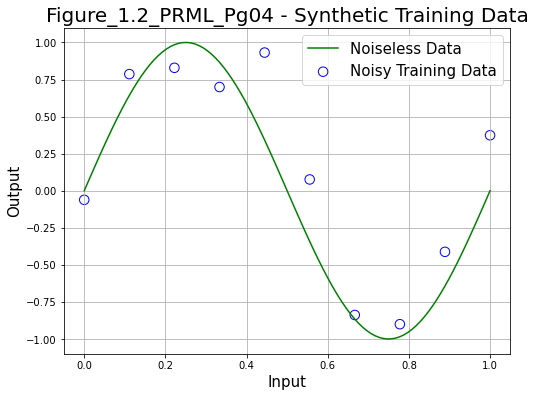

In [2]:
# Define functions
def sine_func(x): # Function to generate a noiseless sine wave
    return np.sin(2 * np.pi * x)

def noiseless_data(func, num_samp): # Generate synthetic noiseless data for baseline
    x = np.linspace(0, 1, num_samp) # Generate inputs
    y = func(x) # Generate noiseless output
    return x, y

def synth_regn_data(func, num_samp, std_dev): # Generate synthetic data for regression
    x = np.linspace(0, 1, num_samp) # Generate inputs
    y_noiseless = func(x) # Generate noiseless output
    noise = np.random.normal(scale = std_dev, size = num_samp) # Gaussian random noise with 
                                                               # zero mean and standard-devn = std_dev
    y = y_noiseless + noise # Generate final noisy output
    return x, y

np.random.seed(seed = 12345) # Set random seed

# Generate underlying ground-truth data
X_orig, y_orig = noiseless_data(sine_func, 100)

# Noise: std-dev = 0.3, variance = 0.9, precision (beta) = 11.111
# Refer Sec 1.2.4, Pg. 24 for definition of precision (beta)
# std-dev = 0.3 chosen as mentioned in Appendix A.
X_train, y_train = synth_regn_data(sine_func, 10, 0.3)

# Plot training set data
plt.figure(figsize = (8, 6))
plt.plot(X_orig, y_orig, color = 'g', label = 'Noiseless Data')
plt.scatter(X_train, y_train, facecolor = "none", edgecolor = 'b', s = 90,\
            label = 'Noisy Training Data')
plt.legend(fontsize = 15)
plt.title("Figure_1.2_PRML_Pg04 - Synthetic Training Data", fontsize = 20)
plt.xlabel("Input", fontsize = 15)
plt.ylabel("Output", fontsize = 15)
plt.grid(b = True)
plt.show()

## Generate synthetic data - Test dataset

Refer Pg. 6, last page of PRML for definition of test dataset. Use std-dev = 0.4 for test set.

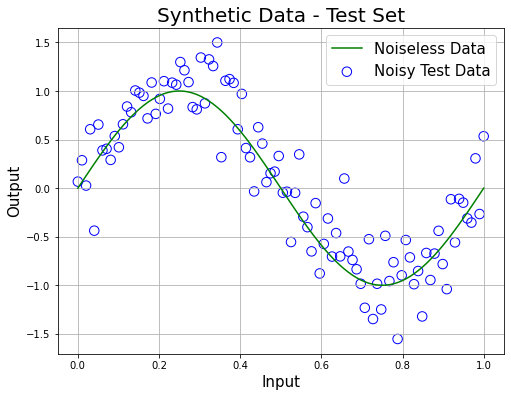

In [3]:
# Change random seed and generate test dataset
np.random.seed(seed = 54321) # Set random seed
X_test, y_test = synth_regn_data(sine_func, 100, 0.3)

# Plot test set data
plt.figure(figsize = (8, 6))
plt.plot(X_orig, y_orig, color = 'g', label = 'Noiseless Data')
plt.scatter(X_test, y_test, facecolor = "none", edgecolor = 'b', s = 90,\
            label = 'Noisy Test Data')
plt.legend(fontsize = 15)
plt.title("Synthetic Data - Test Set", fontsize = 20)
plt.xlabel("Input", fontsize = 15)
plt.ylabel("Output", fontsize = 15)
plt.grid(b = True)
plt.show()

## Perform polynomial regression

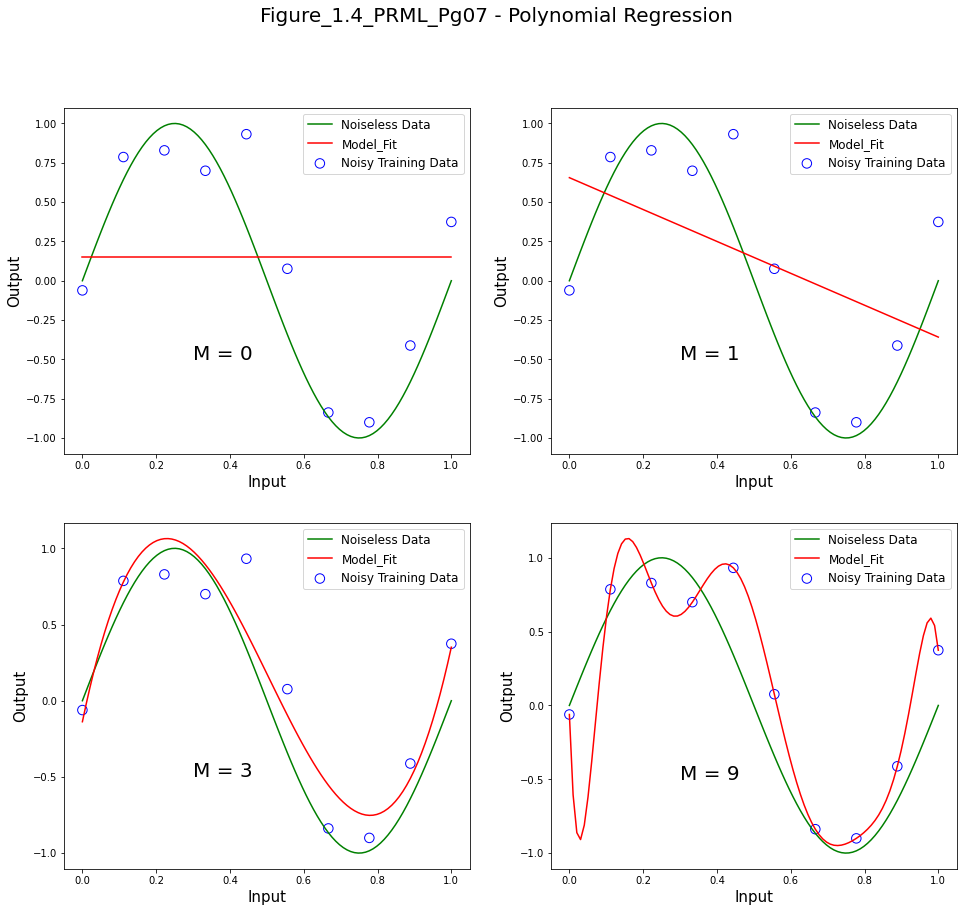

In [4]:
# Reshape features
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

fig = plt.figure(figsize = (16, 14))
fig.suptitle("Figure_1.4_PRML_Pg07 - Polynomial Regression", fontsize = 20)
degrees = list(range(10)) # List of polynomial orders to evaluate
degrees_plot = [0, 1, 3, 9] # List of polynomial orders to plot
rmse_train = [] # Placeholder to store RMSE values for training set
rmse_test = [] # Placeholder to store RMSE values for testing set
coef_list = [] # Placeholder to store coefficients of all models
axis_ind = 1 # Axis index to use while plotting

for deg in degrees: # Iterate through degrees
    # Define polynomial object with degree = deg
    poly = PolynomialFeatures(degree = deg, include_bias = True)
    # Fit polynomial object to X_train
    poly.fit(X_train)
    # Obtain polynomial transformation of X_train and X_orig
    X_train_poly = poly.transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Define Linear regression model
    reg = LinearRegression()
    # Fit Linear regression model to X_train_poly and y_train
    reg.fit(X_train_poly, y_train)
    # Add coefficients of current model to coef_list
    coef_list.append(reg.coef_)
    # Computer RMSE for training set and update rmse_train
    y_pred = reg.predict(X_train_poly)
    rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    # Generate predictions for X_test_poly input
    y_pred = reg.predict(X_test_poly)
    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    if deg in degrees_plot: # Plot only if deg is present in degrees_plot
        # Plot data
        ax = plt.subplot(2, 2, (axis_ind))
        ax.plot(X_orig, y_orig, color = 'g', label = 'Noiseless Data')
        plt.scatter(X_train, y_train, facecolor = "none", edgecolor = 'b', s = 90,\
                    label = 'Noisy Training Data')
        plt.plot(X_orig, y_pred, color = 'r', label = 'Model_Fit')
        plt.legend(fontsize = 12)
        plt.xlabel("Input", fontsize = 15)
        plt.ylabel("Output", fontsize = 15)
        plt.annotate(f"M = {deg}", xy = (0.3, -0.5), fontsize = 20)
        axis_ind += 1

plt.show()

## Plot training and test set RMSE

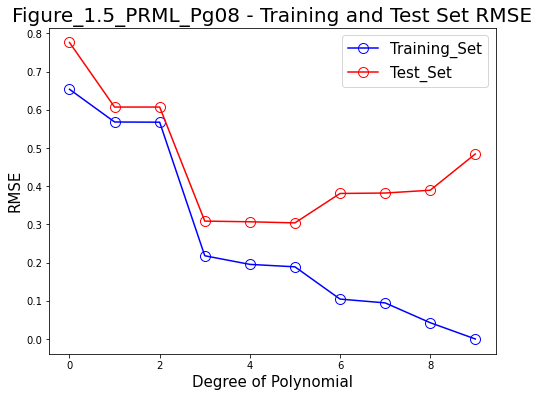

In [5]:
plt.figure(figsize = (8, 6))
plt.title("Figure_1.5_PRML_Pg08 - Training and Test Set RMSE", fontsize = 20)
plt.plot(rmse_train, 'o-', c = 'b', mfc = 'none', mec = 'b', ms = 10, label = 'Training_Set')
plt.plot(rmse_test, 'o-', c = 'r', mfc = 'none', mec = 'r', ms = 10, label = 'Test_Set')
plt.xlabel('Degree of Polynomial', fontsize = 15)
plt.ylabel('RMSE', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## Table of coefficients for the various models

**Ref:** Table 1.1, Pg. 8 of PRML

In [6]:
coef_dict = {'M_0': np.pad(coef_list[0], pad_width = (0, 9)),
             'M_1': np.pad(coef_list[1], pad_width = (0, 8)),
             'M_2': np.pad(coef_list[2], pad_width = (0, 7)),             
             'M_6': np.pad(coef_list[6], pad_width = (0, 3)),
             'M_9': coef_list[9]}
index = ['W_'+ str(ind) for ind in range(10)]
coef_df = pd.DataFrame(coef_dict, index)
coef_df

,M_0,M_1,M_2,M_6,M_9
W_0,0.0,0.000000,0.000000,0.000000,0.000000
W_1,0.0,-1.013793,-0.731739,20.228480,-71.233159
W_2,0.0,0.000000,-0.282054,-179.207042,1881.657800
W_3,0.0,0.000000,0.000000,741.865423,-17173.968839
W_4,0.0,0.000000,0.000000,-1493.243700,79116.590616
W_5,0.0,0.000000,0.000000,1382.762347,-207880.026081
W_6,0.0,0.000000,0.000000,-471.983770,325061.420386
W_7,0.0,0.000000,0.000000,0.000000,-299561.835594
W_8,0.0,0.000000,0.000000,0.000000,150346.293557
W_9,0.0,0.000000,0.000000,0.000000,-31718.463344


# Section 1.2.6 - Bayesian curve fitting

## Define Class: Bayesian Regression

In [9]:
class BayesianRegression():
    """
    Bayesian regression model
    Ref: Section 1.2.6, 3.3.1, 3.3.2 of PRML
    Model assumes both alpha and beta are known in advance and not inferred from training data.
    

    w ~ N(W|0, alpha^(-1)I). Eqn. 1.65, Pg. 30 of PRML
    """

    def __init__(self, alpha:float=1., beta:float=1.):
        self.alpha = alpha # Precision of prior distribution (Eqn. 1.65, Pg. 30 of PRML)
        self.beta = beta # Precision of grount-truth distribution of output 
                         # (Eqn 1.60, Pg. 28 of PRML)
        #self.w_mean = None
        #self.w_precision = None
        
    def _get_prior(self, ndim:int) -> tuple:
        """
        Return mean vector and precision matrix of the prior distribution
        Ref: Eqn. 1.65, Pg. 30 of PRML
        Mean vector = zero vector
        Precision matrix = (alpha)^(-1) * I
        """
        return np.zeros(ndim), self.alpha * np.eye(ndim)
    
    def fit(self, PHI:np.ndarray, t:np.ndarray):
        """
        Bayesian update of parameters given training dataset

        Parameters
        ----------
        PHI : (N, M) np.ndarray
                  Design matrix as defined in Eqn. 3.16, Pg. 142 of PRML
        t : (N,) np.ndarray
            training data dependent variable
        """
        
        # Number of features in training data input
        M = PHI.shape[1] 
        # Extract prior mean and precision (m0, S0_inv)
        mean_prior, precision_prior = self._get_prior(M)
        # Compute posterior precision (SN_inv)
        # Ref: Eqn. 3.51, Pg. 153 of PRML
        precision_posterior = precision_prior + self.beta * PHI.T @ PHI
        # Computer posterior mean (mN)
        # Ref: Eqn. 3.50, pg. 153 of PRML
        # mN obtained as the solution of Ax = b, where:
        # A = SN_inv, b = (S0_inv * m0 + beta * phi.T * t) and x = mN
        mean_posterior = np.linalg.solve(precision_posterior,\
                                         precision_prior @ mean_prior + self.beta * PHI.T @ t)
        self.mN = mean_posterior # Mean of the posterior
        self.SN_inv = precision_posterior # Precision matrix of the posterior
        self.SN = np.linalg.inv(precision_posterior) # Covariance matrix of the posterior.
        
    def predict(self, PHI:np.ndarray, return_std:bool=False, sample_size:int=None):
        """
        return mean (and standard deviation) of predictive distribution

        Parameters
        ----------
        PHI : (N, M) np.ndarray
              independent variable
        return_std : bool, optional
            flag to return standard deviation (the default is False)
        sample_size : int, optional
            number of samples to draw from the predictive distribution
            (the default is None, no sampling from the distribution)

        Returns
        -------
        y : (N,) np.ndarray
            mean of the predictive distribution
        y_std : (N,) np.ndarray
            standard deviation of the predictive distribution
        y_sample : (N, sample_size) np.ndarray
            samples from the predictive distribution
        """

        if sample_size is not None:
            w_sample = np.random.multivariate_normal(
                self.w_mean, self.w_cov, size=sample_size
            )
            y_sample = X @ w_sample.T
            return y_sample
        else:
            y = PHI @ self.w_mean
            if return_std:
                y_var = 1 / self.beta + np.sum(PHI @ self.w_cov * PHI, axis=1)
                y_std = np.sqrt(y_var)
                return y, y_std
            else:
                return y        

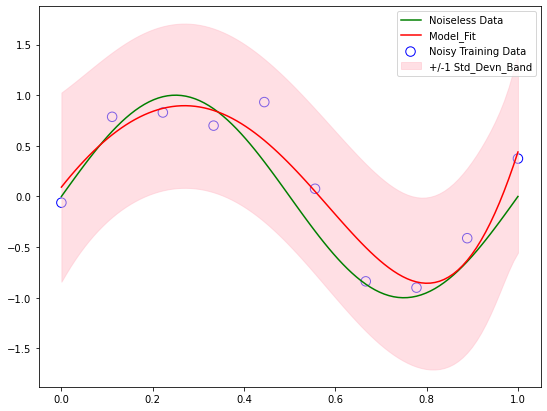

In [18]:
model = BayesianRegression(alpha = 2e-3, beta = 2)
model.fit(X_train_poly, y_train)
y_test_pred, y_test_std = model.predict(X_test_poly, return_std=True)
plt.figure(figsize = (9, 7))
plt.plot(X_orig, y_orig, color = 'g', label = 'Noiseless Data')
plt.scatter(X_train, y_train, facecolor = "none", edgecolor = 'b', s = 90,\
        label = 'Noisy Training Data')
plt.plot(X_test, y_test_pred, color = 'r', label = 'Model_Fit')
plt.fill_between(X_test.squeeze(), (y_test_pred - y_test_std), (y_test_pred + y_test_std),\
                 color = "pink", label = "+/-1 Std_Devn_Band", alpha = 0.5)
plt.legend()
plt.show()